# Fake News Detection Using Machine Learning Algorithms

In [19]:
#import necessary libraries
import pandas as pd
import re
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier


In [20]:
#load training and testing sets
df=pd.read_csv("Constraint_Train.csv")
test=pd.read_csv("english_test_with_labels.csv")


In [21]:
#print first records of the training set
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real


In [22]:
#print first records of the testing set

test.head()

,id,tweet,label
0,1,Our daily update is published. States reported 734k tests 39k new cases and 532 deaths. Current hospitalizations fell below 30k for the first time since June 22. https://t.co/wzSYMe0Sht,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He Were To Catch The Coronavirus https://t.co/3MEWhusRZI #donaldtrump #coronavirus,fake
3,4,States reported 630 deaths. We are still seeing a solid national decline. Death reporting lags approximately 28 days from symptom onset according to CDC models that consider lags in symptoms time in hospital and the death reporting process. https://t.co/LBmcot3h9a,real
4,5,This is the sixth time a global health emergency has been declared under the International Health Regulations but it is easily the most severe-@DrTedros https://t.co/JvKC0PTett,real


In [23]:
print(df.shape)
print(test.shape)

(6420, 3)
(2140, 3)


# Preprocessing


In [24]:
#read some real tweets
pd.set_option('display.max_colwidth',None)

df[df.label=="real"].tweet

0                                                                                                                 The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
1                                                                                                                                                                              States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
3                                                                                                   #IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
4                                                                        Populous sta

In [25]:
#read some fake tweets
pd.set_option('display.max_colwidth',None)

df[df.label=="fake"].tweet

2                                                                                                           Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
7                                                                                                                                                           Obama Calls Trump’s Coronavirus Response A Chaotic Disaster https://t.co/DeDqZEhAsB
8                                                                                                                                          ???Clearly, the Obama administration did not leave any kind of game plan for something like this.??�
9                                                                    Retraction—Hydroxychloroquine or chloroquine with or without a macrolide for treatment of COVID-19: a multinational registry analysis - The Lancet https://t.co/L5V2x6G9or
11                   The NBA is poised t

In [26]:
# Import label encoder to transform label categories'fake,true) into numbers
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'labels'+create a new column for both datasets
df['NB_label']= label_encoder.fit_transform(df['label'])
test['NB_label']= label_encoder.fit_transform(test['label'])

#check if the dataset is balanced
df['NB_label'].value_counts()


1    3360
0    3060
Name: NB_label, dtype: int64

In [27]:
#count nan values in training dataset
df.isna().any(axis=1).sum()

0

In [28]:
#function to preprocess the tweets
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delet stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [29]:
#apply preprocessing function on both training and test tweets
df['processed_data']=df['tweet'].apply(lambda x: preprocess(x))
test['processed_data']=test['tweet'].apply(lambda x: preprocess(x))

In [30]:
#display the new dataframe
df

,id,tweet,label,NB_label,processed_data
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real,1,cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real,1,state report death small rise last tuesday southern state report death http co yasgrtt ux
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake,0,polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real,1,indiafightscorona covid test laboratori india th august test done profbhargava dg icmrdelhi staysaf indiawillwin http co yh zxknnhz
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real,1,popul state gener larg case count look new case per million today smaller state show case per million california texa al ar id ks ky la ms nv sc http co pyw cwra
...,...,...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please stay away from your pets and birds.,fake,0,tiger test posit covid pleas stay away pet bird
6416,6417,"???Autopsies prove that COVID-19 is??� a blood clot, not pneumonia, ???and ought to be fought with antibiotics??� and the whole world has been wrong in treating the ???so-called??� pandemic.",fake,0,autopsi prove covid blood clot pneumonia ought fought antibiot whole world wrong treat call pandem
6417,6418,_A post claims a COVID-19 vaccine has already been developed and will cause widespread infertility._,fake,0,post claim covid vaccin alreadi develop caus widespread infertil
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,0,aamir khan donat cr pm relief care fund


In [31]:
#split train and test dataset columns into features and outcome
X=df['processed_data']
print(X)
y=df['NB_label']

Xtest=test['processed_data']
ytest=test['NB_label']

0                                                       cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today
1                                                                               state report death small rise last tuesday southern state report death http co yasgrtt ux
2                                                                       polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil
3                                     indiafightscorona covid test laboratori india th august test done profbhargava dg icmrdelhi staysaf indiawillwin http co yh zxknnhz
4       popul state gener larg case count look new case per million today smaller state show case per million california texa al ar id ks ky la ms nv sc http co pyw cwra
                                                                                      ...                                                             

# Bag of Words

In [32]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

X_cv = cv.fit_transform(X).toarray()
#apply cv to test vectorizer
test_cv=cv.transform(Xtest).toarray()

In [33]:
cv.get_feature_names()

C:\Users\LAMYA\Anaconda3\envs\tensoflow200\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abia',
 'abia gomb',
 'abil',
 'abl',
 'absolut',
 'acc',
 'acc mohfw',
 'acc mohfw india',
 'acceler',
 'accept',
 'access',
 'access covid',
 'access covid tool',
 'accord',
 'accord new',
 'account',
 'account total',
 'accur',
 'accus',
 'achiev',
 'acid',
 'acquir',
 'acquir local',
 'acquir local unknown',
 'across',
 'across countri',
 'across india',
 'across state',
 'across uk',
 'across world',
 'act',
 'act acceler',
 'action',
 'activ',
 'activ addit',
 'activ addit death',
 'activ case',
 'activ case countri',
 'activ case death',
 'activ case http',
 'activ case import',
 'activ case lakh',
 'activ case new',
 'activ case total',
 'activ covid',
 'activ covid case',
 'actor',
 'actual',
 'acut',
 'ad',
 'adamawa',
 'add',
 'addit',
 'addit death',
 'addit death report',
 'addit recov',
 'addit recov case',
 'address',
 'adequ',
 'adher',
 'adjust',
 'administ',
 'administr',
 'admiss',
 'admit',
 'admit covid',
 'adult',
 'advanc',
 'advic',
 'advis',
 'advisori',
 'ae

In [34]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33, random_state=0)

In [35]:
#create  function to plot confusion matrix
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
#train different algorithms and compare them using accuracy
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearSVC', LinearSVC()))
models.append(('PassiveAggressiveClassifier', PassiveAggressiveClassifier()))
# evaluate each model in turn
names = []

scoring = 'accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    msg = "%s: %f" % (name, score)
    print(msg)


LogisticRegression: 0.929212
LinearSVC: 0.923549
PassiveAggressiveClassifier: 0.919773


accuracy:   0.924
Confusion matrix, without normalization


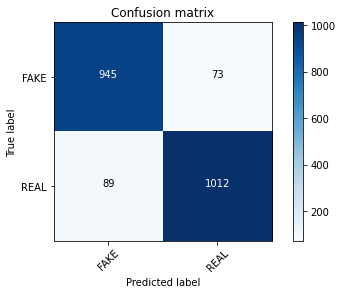

In [37]:
# linearSVC

svc = LinearSVC().fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.929
Confusion matrix, without normalization


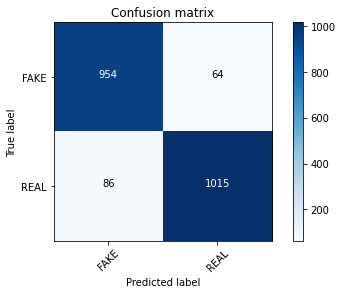

In [38]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
#passiveclassifier

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.920
Confusion matrix, without normalization


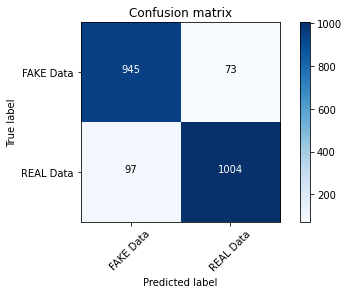

In [41]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [42]:
#bag of words test
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# evaluate each model in turn
results = []

scoring = 'accuracy'
for name, model in models:
    pred = model.predict(test_cv)
    score = metrics.accuracy_score(ytest, pred)
    msg = "%s: %f" % (name, score)
    print(msg)
# boxplot algorithm comparison


LogisticRegression: 0.932710
LinearSVC: 0.921963
PassiveAggressiveClassifier: 0.925234


# TF-IDF

In [43]:
# Creating the Bag of Words model by applying tfidif -convert textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_idf = vectorizer.fit_transform(X).toarray()
test_idf=vectorizer.transform(Xtest).toarray()

In [44]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_idf, y, test_size=0.33, random_state=0)

In [45]:
#TfiDF
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearSVC', LinearSVC()))
models.append(('PassiveAggressiveClassifier', PassiveAggressiveClassifier()))
# evaluate each model in turn
results = []
names = []
seed = 7

scoring = 'accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    msg = "%s: %f" % (name, score)
    print(msg)
# boxplot algorithm comparison


LogisticRegression: 0.916470
LinearSVC: 0.933931
PassiveAggressiveClassifier: 0.930156


# Test

In [46]:
#TfiDF
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# evaluate each model in turn
results = []

scoring = 'accuracy'
for name, model in models:
    pred = model.predict(test_idf)
    score = metrics.accuracy_score(ytest, pred)
    msg = "%s: %f" % (name, score)
    print(msg)
# boxplot algorithm comparison


LogisticRegression: 0.919159
LinearSVC: 0.935047
PassiveAggressiveClassifier: 0.933645


# Best performance on this dataset: LinearSVC